<h1>Second by Second: Length above All</h1>

<h3>The Beatles Songs Analysis Project</h3>

Here I analyze statistical information about songs length as a simple but interesting attribute.

In [1]:
# this allows plots to appear directly in the notebook
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load data
df = pd.read_json('data.json')

# configure graphics 
plt.style.use('ggplot')
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

Let's examine briefly overall songs length data: first of all, look at the main statistical parameters and create a box plot.

In [2]:
df.length.describe()

count    208.000000
mean     161.788462
std       54.204421
min       23.000000
25%      132.500000
50%      152.000000
75%      179.250000
max      467.000000
Name: length, dtype: float64

Text(0,0.5,'Seconds')

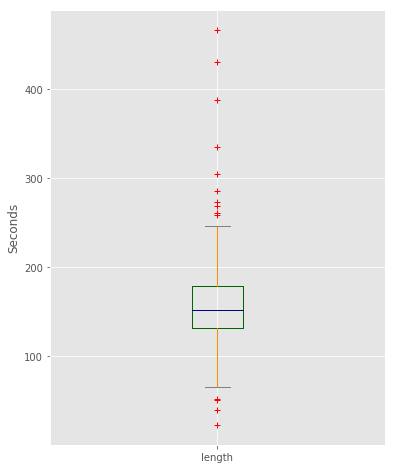

In [3]:
df.length.plot.box(color=color, sym='r+', figsize=(6, 8)).set_ylabel('Seconds')

We see that the range is huge, and there are many outliers! Let's identify the shortest and the longest songs.

In [4]:
# the shortest song's title
df[df.length==df.length.min()].title.iat[0]

'Her Majesty'

In [5]:
# the shortest song's album
df[df.length==df.length.min()].album_title.iat[0]

'Abbey Road'

In [6]:
# the shortest song's year
df[df.length==df.length.min()].year.iat[0]

1969

In [7]:
# the longest song's title
df[df.length==df.length.max()].title.iat[0]

"I Want You (She's So Heavy)"

In [8]:
# the longest song's album
df[df.length==df.length.max()].album_title.iat[0]

'Abbey Road'

So the minimum length is only 23 seconds (it's <i><a href="https://en.wikipedia.org/wiki/Her_Majesty_(song)">Her Majesty</a></i> from <b><a href="https://en.wikipedia.org/wiki/Abbey_Road">Abbey Road</a></b>, 1969), the maximum length is 467 seconds (almost 8 minutes, it's <i><a href="https://en.wikipedia.org/wiki/I_Want_You_(She%27s_So_Heavy)">I Want You</a></i> from the same album! 

The mean is about 162 seconds (about 2.7 minutes) which seems to be rather little.

Let's see now how songs length changes with time.

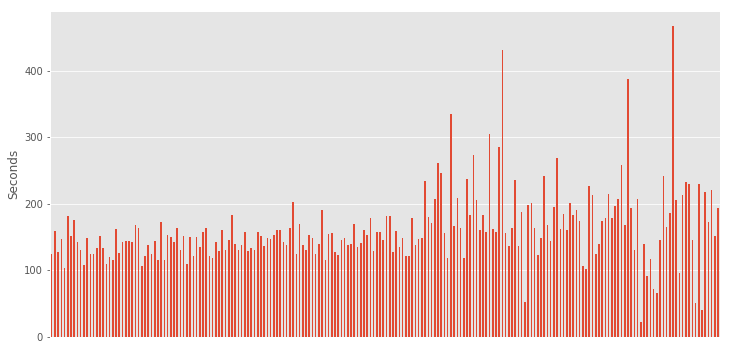

In [9]:
df_sorted = df.sort_values(by='year')
ds = df_sorted.length.plot(kind='bar', figsize=(12, 6))
ds.set_ylabel('Seconds')
ds.xaxis.set_visible(False)
ds

You can see easily that in the first half the songs tend to be rather uniform in length, but in the second half variance rises dramatically.

Let's compare the means, variance and median by years.

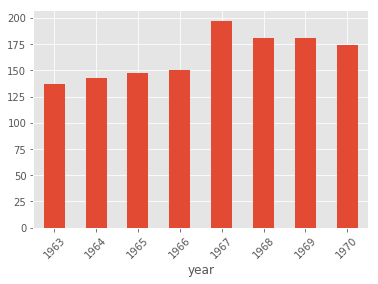

In [10]:
# compare means
gr = df_sorted.groupby('year')
gr.length.aggregate(np.mean).plot(kind='bar', rot=45)

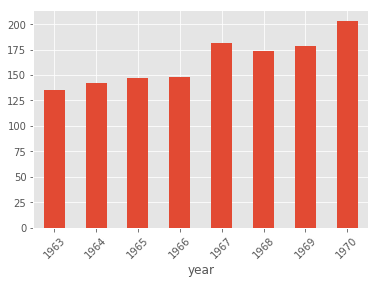

In [11]:
# compare medians
gr.length.aggregate(np.median).plot(kind='bar', rot=45)

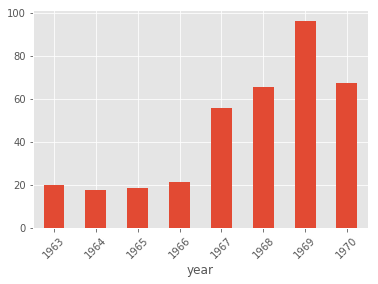

In [12]:
# compare standard deviations
gr.length.aggregate(np.std).plot(kind='bar', rot=45)

We clearly see two different periods: 1963-66 and 1967-70. In the first, short mean and median lengths slowly rise, while the songs are rather uniform; in the second, long mean lengths slightly fall, and the variance is rather high. But it's interesting that median song length generally only rises with time, so the average song becomes a bit longer every year.

Let's see now how cover songs affect songs length. First, let's see how long they are and to which years they belong. 

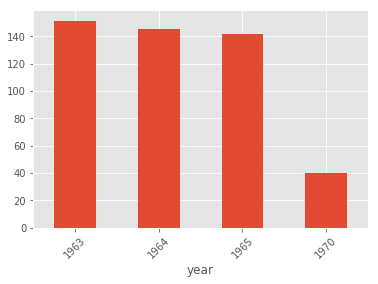

In [13]:
# group cover songs by year and plot their mean lengths
gr_cover = df_sorted[df_sorted.cover==True].groupby('year')
gr_cover.length.aggregate(np.mean).plot(kind='bar', rot=45)

So, almost all covers belong to the first three years and are rather uniform. After that, let's compare total lengths with original songs lengths.

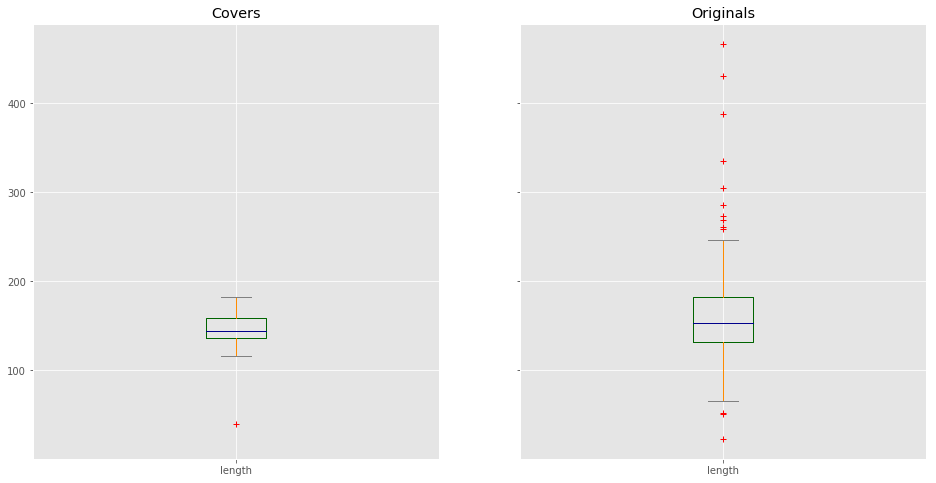

In [14]:
# separate original songs from cover songs
df_orig = df[df.cover==False]
df_cover = df[df.cover==True]
fig, axs = plt.subplots(1, 2, sharey=True)
df_cover.length.plot.box(color=color, sym='r+', ax=axs[0], figsize=(16, 8), title='Covers')
df_orig.length.plot.box(color=color, sym='r+', ax=axs[1], figsize=(16, 8), title='Originals')

We see that covers are much more uniform in comparison to originals. They also tend to be a bit shorter.

In [15]:
df_orig.length.describe()

count    184.000000
mean     164.184783
std       56.401068
min       23.000000
25%      132.500000
50%      153.000000
75%      183.000000
max      467.000000
Name: length, dtype: float64

Without covers, there are 184 original songs, and the mean length is 164 seconds (compared to overall 162), while standard deviation is 61.5 (compared to overall 54.2). 

Let's find the most typical songs by length, i.e. those with median length.

In [16]:
df['length'].median()

152.0

The median length is 152 seconds (which is less than the mean), i.e., about 2.5 minutes.

In [17]:
# songs with median length
df[df.length==df.length.median()].title

37           For You Blue
167    A Hard Day's Night
171        And I Love Her
188         Hold Me Tight
Name: title, dtype: object

And which year are they from?

In [18]:
# songs with median length's years
df[df.length==df.length.median()].year

37     1970
167    1964
171    1964
188    1963
Name: year, dtype: int64

Three of the four are from the first period. No surprise, given the higher variability in the second period.

The last mark; let's see the distribution of total length by year.

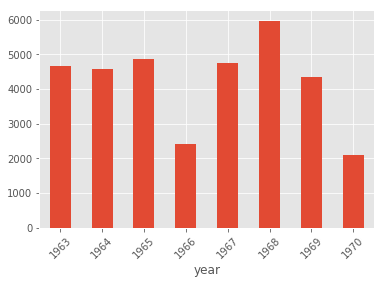

In [19]:
gr.length.sum().plot(kind='bar', rot=45)

As you can see, the Beatles gave us most minutes of music in 1968, with the <b><a href="https://en.wikipedia.org/wiki/The_Beatles_(album)">White Album</a></b> (no single was out that year). The shortest year is the last, 1970.

<h2>Conclusion</h2>

The overall mean song length is about 162 seconds, i.e., about 2.7 minutes. But there are two disinct periods: 1963-1966 and 1967-1970. In the first, short mean lengths slowly rise and the songs are rather uniform. In the second, long mean lengths slightly fall, but variance is rather high. The shortest and the longest songs both are in the second period (<i>Her Majesty</i> from <b>Abbey Road</b>, 1969 - 21 seconds, and <i>I Want You</i> from the same album, 467 seconds).

Cover versions are present almost entirely only in the first period and in general are only a bit shorter and a bit more uniform. So they do not affect statistical parameters in a significant degree. The most typical songs in terms of length (152 seconds) are <i>For You Blue</i>, <i>A Hard Day's Night</i>, <i>And I Love Her</i> and <i>Hold Me Tight</i>. The most productive year for the band in terms of length was 1968, while the least so was 1970.